### Import Libraries and Dependencies

In [1]:
import pandas as pd
from pathlib import Path
%matplotlib inline

### Read CSV as Pandas DataFrame

In [12]:
# Read in csv
csv_path = Path("../Resources/tsla_google_finance.csv")
tsla_df = pd.read_csv(csv_path, parse_dates=True, infer_datetime_format=True)
tsla_df.head()

,Date,Close
0,11/13/18,338.73
1,11/14/18,344.00
2,11/15/18,348.44
3,11/16/18,354.31
4,11/19/18,353.47


### Index Data by `Date`

In [13]:
# Set `Date` as index
tsla_df = tsla_df.set_index("Date")

### Assess and Clean Data

In [14]:
# Check for nulls
tsla_df.isnull().sum()

# Drop missing values
tsla_df.dropna(inplace=True)

# Validate no more missing values
tsla_df.isnull().mean()

Close    0.0
dtype: float64

### Calculate Daily Returns

In [16]:
# Calculate daily returns
#tsla_slice = tsla_df.loc['2018-11-13':'2019-05-09']
tsla_returns = tsla_df.pct_change()
tsla_returns

,Close
Date,
11/13/18,NaN
11/14/18,0.015558
11/15/18,0.012907
11/16/18,0.016847
11/19/18,-0.002371
...,...
5/8/19,-0.008986
5/9/19,-0.011681
5/10/19,-0.010166


### Sort the DataFrame by `Close` to Get Records with Top Daily Returns

In [19]:
# Sort data by `Close` in descending order
tsla_returns.sort_values('Close', ascending=False)

,Close
Date,
12/26/18,0.103930
11/26/18,0.061903
1/4/19,0.057697
2/27/19,0.056671
12/28/18,0.056116
...,...
12/24/18,-0.076242
3/1/19,-0.078436
4/4/19,-0.082348


### Slice Out 5 Records

In [20]:
# Slice out top 5
top5 = tsla_returns.iloc[:5]

### Plot Top 5 Performing Days for TSLA Daily Returns

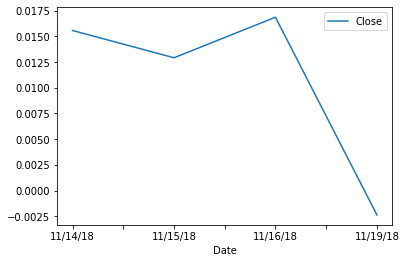

In [21]:
# Plot top 5 performing days
top5.plot()

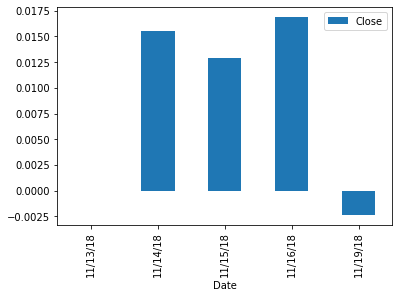

In [22]:
# Alternatively, visualizing the returns as a bar chart:
top5.plot(kind='bar')